In [54]:
# general packages
import seaborn as sns
import pandas as pd
from warnings import filterwarnings
import matplotlib.pyplot as plt
import ast
import timeit

# math and stats packages
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import array, mean, median, std
import warnings

# api related packages
import requests
import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr
import quandl

# settings
warnings.filterwarnings('ignore') #ignore annoying warning (from sklearn and seaborn)
%matplotlib inline
plt.style.use('seaborn')

In [55]:
quandl.ApiConfig.api_key = "bhnUp4wu_kkHmzfasJWH"


In [56]:
df = pd.read_csv('/home/giwrikas/Downloads/Morphemic_datasets/result_0.csv',  error_bad_lines=False)
df.isna().sum()
df.info()
df.count().tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            8641 non-null   float64
 1   served_request  8641 non-null   int64  
 2   request_rate    8641 non-null   int64  
 3   response_time   8641 non-null   float64
 4   performance     8641 non-null   float64
 5   cpu_usage       8641 non-null   float64
 6   memory          8641 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 472.7 KB


request_rate     8641
response_time    8641
performance      8641
cpu_usage        8641
memory           8641
dtype: int64

In [57]:
#look at data
print('Max length = %s' % len(df))

# check head
df.head()

Max length = 8641


,time,served_request,request_rate,response_time,performance,cpu_usage,memory
0,1.602539e+09,2110,426,673.574009,0.626509,31.6,71798784
1,1.602539e+09,1845,314,132.285077,2.774311,25.8,65302528
2,1.602539e+09,2284,461,3.297176,139.816605,36.1,65859584
3,1.602539e+09,2354,469,3.262062,143.774081,36.9,65826816
4,1.602539e+09,2301,463,3.245653,142.652344,36.9,65777664


In [58]:
for i in df['time']:
    df['time'].replace(i,pd.Timestamp(i, unit='s'), inplace=True)
    #print(data['time'][i])
df.head()

,time,served_request,request_rate,response_time,performance,cpu_usage,memory
0,2020-10-12 21:37:07.766000032,2110,426,673.574009,0.626509,31.6,71798784
1,2020-10-12 21:37:17.766000032,1845,314,132.285077,2.774311,25.8,65302528
2,2020-10-12 21:37:27.766000032,2284,461,3.297176,139.816605,36.1,65859584
3,2020-10-12 21:37:37.766000032,2354,469,3.262062,143.774081,36.9,65826816
4,2020-10-12 21:37:47.766000032,2301,463,3.245653,142.652344,36.9,65777664


In [59]:
df = df.round(decimals=2)

In [60]:
df.head()

,time,served_request,request_rate,response_time,performance,cpu_usage,memory
0,2020-10-12 21:37:07.766000032,2110,426,673.57,0.63,31.6,71798784
1,2020-10-12 21:37:17.766000032,1845,314,132.29,2.77,25.8,65302528
2,2020-10-12 21:37:27.766000032,2284,461,3.30,139.82,36.1,65859584
3,2020-10-12 21:37:37.766000032,2354,469,3.26,143.77,36.9,65826816
4,2020-10-12 21:37:47.766000032,2301,463,3.25,142.65,36.9,65777664


In [61]:
df = df.set_index('time')
df.head()

,served_request,request_rate,response_time,performance,cpu_usage,memory
time,,,,,,
2020-10-12 21:37:07.766000032,2110,426,673.57,0.63,31.6,71798784
2020-10-12 21:37:17.766000032,1845,314,132.29,2.77,25.8,65302528
2020-10-12 21:37:27.766000032,2284,461,3.30,139.82,36.1,65859584
2020-10-12 21:37:37.766000032,2354,469,3.26,143.77,36.9,65826816
2020-10-12 21:37:47.766000032,2301,463,3.25,142.65,36.9,65777664


#### Original and rolling mean window plot

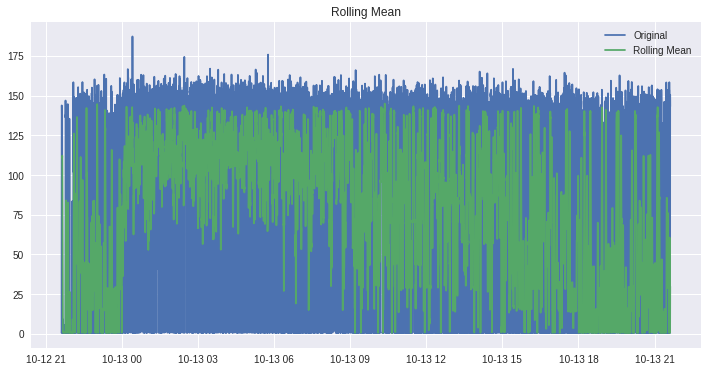

In [22]:
plt.figure(figsize=(12, 6))
rolmean = df['performance'].rolling(window=10).mean()
plt.plot(df['performance'], label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

#### The same but a little closer

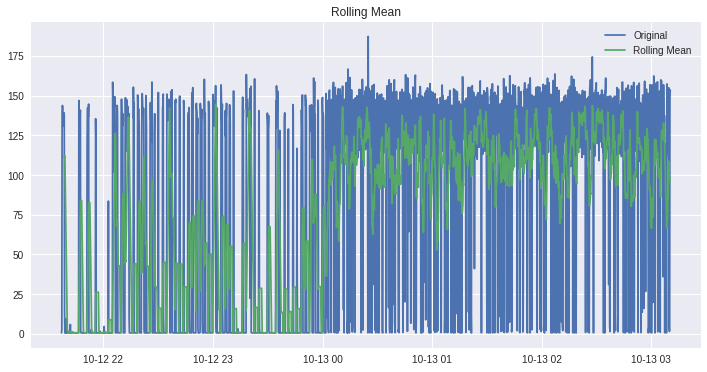

In [23]:
plt.figure(figsize=(12, 6))
rolmean = df['performance'].rolling(window=10).mean()
plt.plot(df['performance'][:2000], label='Original')
plt.plot(rolmean[:2000], label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

#### Even more close

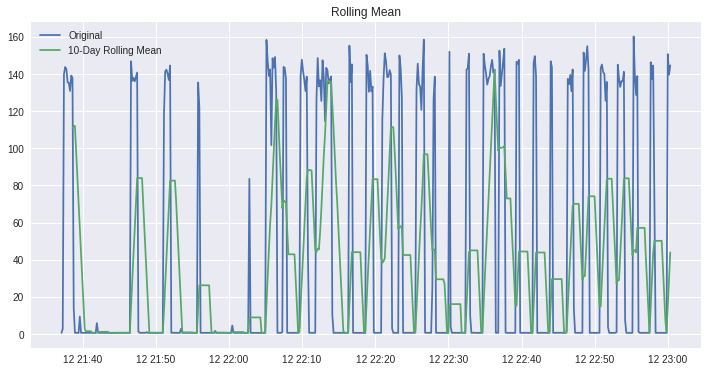

In [26]:
plt.figure(figsize=(12, 6))
rolmean = df['performance'].rolling(window=10).mean()
plt.plot(df['performance'][:500], label='Original')
plt.plot(rolmean[:500], label='10-Day Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

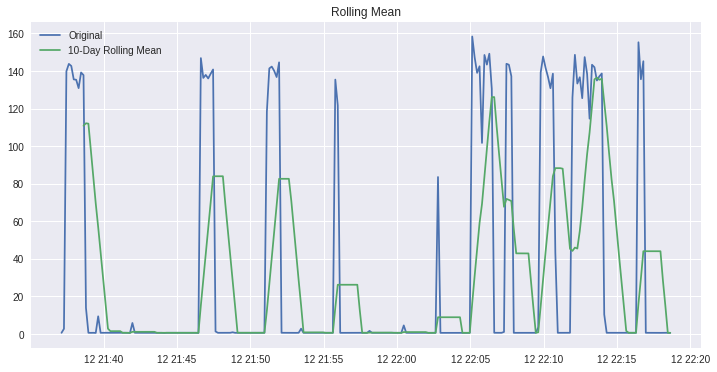

In [27]:
plt.figure(figsize=(12, 6))
rolmean = df['performance'].rolling(window=10).mean()
plt.plot(df['performance'][:250], label='Original')
plt.plot(rolmean[:250], label='10-Day Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

#### Rolling Standard Deviation

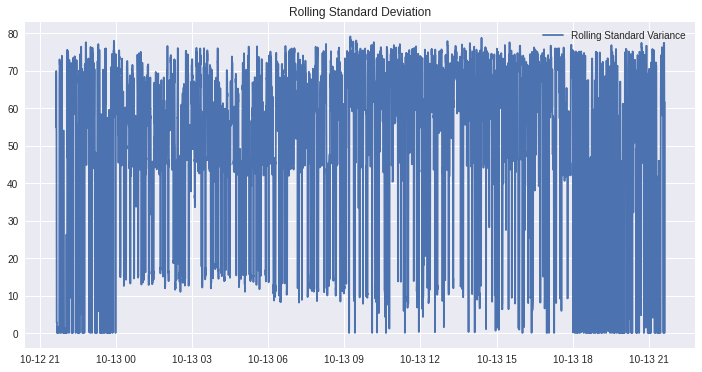

In [29]:
plt.figure(figsize=(12, 6))
rolvar = df['performance'].rolling(window=10).std()
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Standard Deviation')
plt.show(block=False)

### Stationarity 

In [30]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [31]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

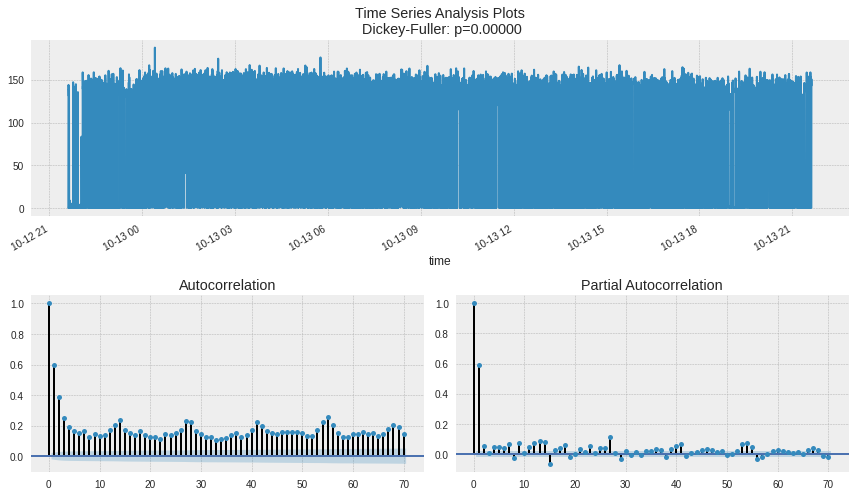

In [32]:
tsplot(df.performance, lags = 70)


### Dickey-Fuller test null hypothesis is rejected (because p-value is 0.0<a(=0.5) -> significance level ) so we can conclude that our time-serie is stationary. 

### Autocorrelation : correlation of a signal with a delayed copy of itself as a function of delay.

### Partial Autocorrelation : correlation of a signal with a delayed copy of itself as a function of delay, controlling the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

#### There is no need to shift the time-serie in order to make it stationary because it is already stationary.

### Modeling

In [9]:
# import a few more package for time series models
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
#models
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings('ignore') #ignore annoying warning (from sklearn and seaborn)

In [133]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg, model, plot = False):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    # create results dataframe for top score
    if plot == True:
        cfg_data.update({"{}".format(cfg):[history, test, predictions]})
        results_df['train'] = [item for sublist in cfg_data["{}".format(cfg)][0] for item in sublist]
        results_df['test']  = [None for i in range(len(df[:500]) - len(cfg_data["{}".format(cfg)][1]))] + [item for sublist in cfg_data["{}".format(cfg)][1] for item in sublist]
        results_df['forecast']  = [None for i in range(len(df[:500]) - len(cfg_data["{}".format(cfg)][2]))] + cfg_data["{}".format(cfg)][2]
        results_df['forecast'] = results_df['forecast'].apply(lambda x: None if x == None else x[0])
        results_df.set_index(df[:500].index, inplace = True)
    return error 

# score a model, return None on failure
def score_model(data, n_test, cfg, model, plot = False, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg, model, plot)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg, model, plot)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, model, parallel=False):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg, model) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg, model) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

### Univariate Models

### BaseLine Model

In [134]:
# one-step simple forecast
def simple_forecast(history, config):
    n, offset, avg_type = config
    # persist value, ignore other config
    if avg_type == 'persist':
        return history[-n]
    # collect values to average
    values = list()
    if offset == 1:
        values = history[-n:]
    else:
        # skip bad configs
        if n*offset > len(history):
            raise Exception('Config beyond end of data: %d %d' % (n,offset))
        # try and collect n values using offset
        for i in range(1, n+1):
            ix = i * offset
            values.append(history[-ix])
    # check if we can average
    if len(values) < 2:
        raise Exception('Cannot calculate average')
    # mean of last n values
    if avg_type == 'mean':
        return mean(values)
    # median of last n values
    return median(values)

# create a set of simple configs to try
def simple_configs(max_length, offsets=[1]):
    configs = list()
    for i in range(1, max_length+1):
        for o in offsets:
            for t in ['persist', 'mean', 'median']:
                cfg = [i, o, t]
                configs.append(cfg)
    return configs

#### Run BaseLine Model

In [137]:
df_1 = pd.DataFrame(df['performance'])

# prepare dataset
data = df_1[:500].values

# data split
n_test = int(len(data) * .2)

In [138]:
# find max length for moving avg parameter (i.e. len of test data)
max_length = len(data) - n_test

# create hyperparameter configs
cfg_list = simple_configs(max_length)
print('Grid search {} configs for simple_forecast'.format(len(cfg_list)))

Grid search 1200 configs for simple_forecast


In [139]:
%%capture
start_time = timeit.default_timer()

# grid search 912 different models 
scores = grid_search(data, cfg_list, n_test, simple_forecast)

In [140]:
elapsed = timeit.default_timer() - start_time
print("Grid search took %.3f seconds" % (elapsed))

Grid search took 31.580 seconds


In [141]:
# list top 3 configs
print('Top 3 scores for simple forecast:')
for cfg, error in scores[:3]:
    print(cfg, error)

Top 3 scores for simple forecast:
[14, 1, 'persist'] 47.49171698306979
[165, 1, 'persist'] 50.363859294140674
[1, 1, 'persist'] 54.49588077093534


In [142]:
# create empty dict and dataframe to store best result
results_df = pd.DataFrame()
cfg_data = {}
top_score = score_model(data, n_test, ast.literal_eval(scores[0][0]), simple_forecast, 
                        plot = True, debug = True)

print(results_df)

 > Model[[14, 1, 'persist']] 47.492
                                train    test  forecast
time                                                   
2020-10-12 21:37:07.766000032    0.63     NaN       NaN
2020-10-12 21:37:17.766000032    2.77     NaN       NaN
2020-10-12 21:37:27.766000032  139.82     NaN       NaN
2020-10-12 21:37:37.766000032  143.77     NaN       NaN
2020-10-12 21:37:47.766000032  142.65     NaN       NaN
...                               ...     ...       ...
2020-10-12 22:59:37.766000032    0.64    0.64      0.63
2020-10-12 22:59:47.766000032    0.59    0.59      0.66
2020-10-12 22:59:57.766000032  150.68  150.68    146.33
2020-10-12 23:00:07.766000032  139.61  139.61    137.22
2020-10-12 23:00:17.766000032  144.63  144.63    144.56

[500 rows x 3 columns]


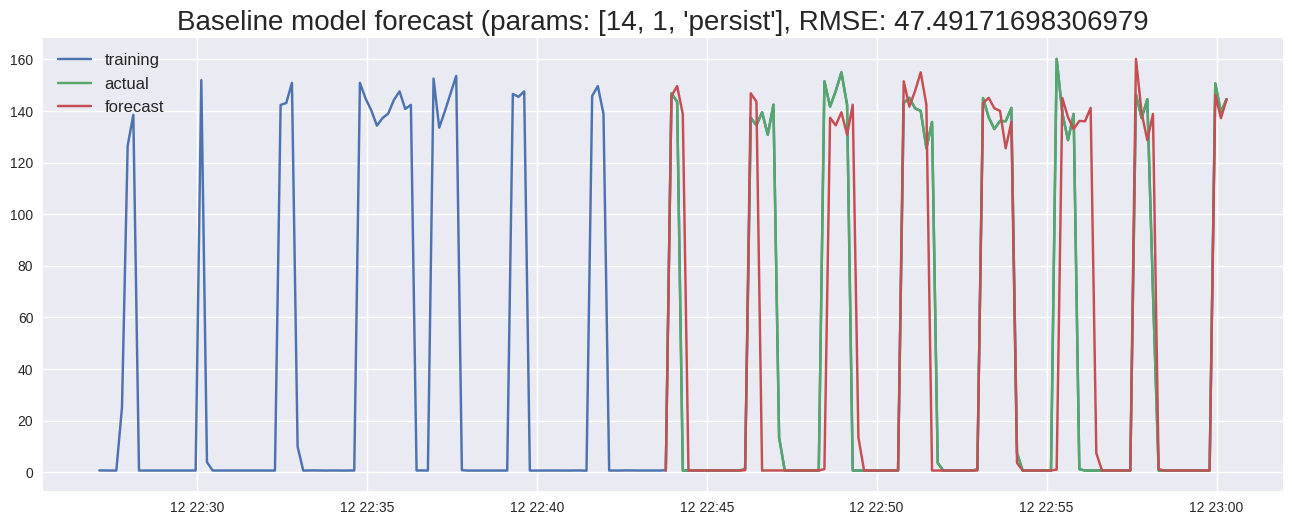

In [143]:
plt.figure(figsize=(16,6), dpi=100)
plt.plot(results_df.train[-200:], label='training')
plt.plot(results_df.test, label='actual')
plt.plot(results_df.forecast, label='forecast')
plt.title('Baseline model forecast (params: {}, RMSE: {}'.format(scores[0][0],scores[0][1]), fontsize = 20)
plt.legend(loc='upper left', fontsize=12)
plt.show()

### Holt Winter's Exponential Smoothing Forecast

In [72]:
# one-step Holt Winter’s Exponential Smoothing forecast
def exp_smoothing_forecast(history, config):
    t,d,s,p,b,r = config
    # define model
    history = array(history)
    model = ExponentialSmoothing(history, trend=t, damped=d, seasonal=s, seasonal_periods=p)
    # fit model
    model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

# create a set of exponential smoothing configs to try
def exp_smoothing_configs(seasonal=[None]):
    models = list()
    # define config lists
    t_params = ['add', 'mul', None]
    d_params = [True, False]
    s_params = ['add', 'mul', None]
    p_params = seasonal
    b_params = [True, False]
    r_params = [True, False]
    # create config instances
    for t in t_params:
        for d in d_params:
            for s in s_params:
                for p in p_params:
                    for b in b_params:
                        for r in r_params:
                            cfg = [t, d, s, p, b, r]
                            
                            models.append(cfg)
    return models

In [73]:
# model configs
cfg_list = exp_smoothing_configs()
print('Grid search {} configs for exp_smoothing_forecast'.format(len(cfg_list)))

Grid search 72 configs for exp_smoothing_forecast


In [74]:
%%capture
start_time = timeit.default_timer()

# grid search 72 model configs
scores = grid_search(data, cfg_list, n_test, exp_smoothing_forecast)

In [75]:
elapsed = timeit.default_timer() - start_time
print("Grid search took %.3f seconds" % (elapsed))

Grid search took 111.769 seconds


In [76]:
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

[None, False, None, None, False, False] 54.498064813705625
['add', True, None, None, False, False] 54.5038069596623
['add', True, None, None, False, True] 54.55450991643987


In [77]:
# create empty dict and dataframe to store best result
results_df = pd.DataFrame()
cfg_data = {}
top_score = score_model(data, n_test, ast.literal_eval(scores[0][0]), exp_smoothing_forecast, plot = True)

{'[None, False, None, None, False, False]': [[array([0.63]), array([2.77]), array([139.82]), array([143.77]), array([142.65]), array([135.52]), array([135.32]), array([130.86]), array([139.19]), array([137.79]), array([13.96]), array([0.65]), array([0.62]), array([0.65]), array([0.57]), array([9.42]), array([0.63]), array([0.65]), array([0.66]), array([0.63]), array([0.64]), array([0.65]), array([0.65]), array([0.64]), array([0.65]), array([0.64]), array([0.67]), array([0.64]), array([0.55]), array([5.87]), array([0.66]), array([0.64]), array([0.66]), array([0.64]), array([0.64]), array([0.64]), array([0.65]), array([0.66]), array([0.65]), array([0.65]), array([0.65]), array([0.63]), array([0.55]), array([0.65]), array([0.65]), array([0.65]), array([0.67]), array([0.65]), array([0.65]), array([0.65]), array([0.65]), array([0.65]), array([0.65]), array([0.65]), array([0.67]), array([0.65]), array([0.56]), array([146.86]), array([136.3]), array([137.9]), array([136.02]), array([138.49]),

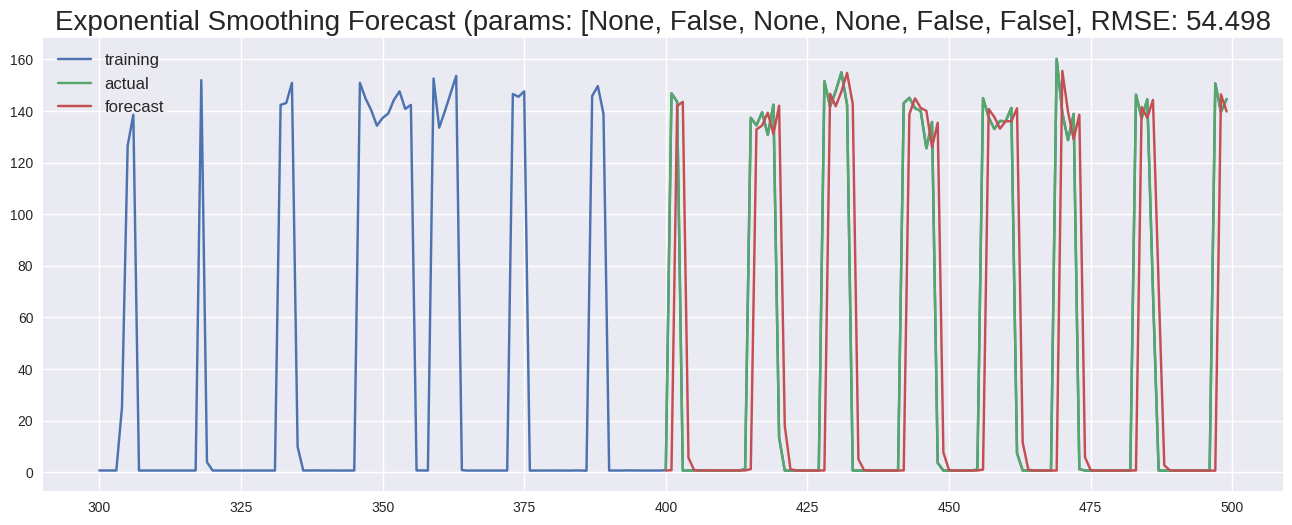

In [78]:
plt.figure(figsize=(16,6), dpi=100)
plt.plot(results_df.train[-200:], label='training')
plt.plot(results_df.test, label='actual')
plt.plot(results_df.forecast, label='forecast')
plt.title('Exponential Smoothing Forecast (params: %s, RMSE: %.3f' % (scores[0][0],scores[0][1]), fontsize = 20)
plt.legend(loc='upper left', fontsize=12)
plt.show()

### Seasonal Autoregressive Integrated Moving Average Forecast

In [79]:
# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
    models = list()
    # define config lists
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct']
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models

In [80]:
# model configs
cfg_list = sarima_configs()
print('Grid search {} configs for sarima_forecast'.format(len(cfg_list)))

Grid search 1296 configs for sarima_forecast


In [81]:
%%capture
start_time = timeit.default_timer()

# grid search 1296 model configs
scores = grid_search(data, cfg_list, n_test, sarima_forecast)

In [82]:
elapsed = timeit.default_timer() - start_time
print("Grid search took %.3f seconds" % (elapsed))

Grid search took 1852.827 seconds


In [83]:
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

[(2, 1, 2), (0, 0, 0, 0), 'n'] 48.18019143831837
[(2, 1, 2), (0, 0, 0, 0), 'c'] 48.20467326626453
[(2, 0, 1), (0, 0, 0, 0), 'c'] 48.40118664997086


In [84]:
results_df = pd.DataFrame()
cfg_data = {}
top_score = score_model(data, n_test, ast.literal_eval(scores[0][0]), sarima_forecast, plot = True)

{"[(2, 1, 2), (0, 0, 0, 0), 'n']": [[array([0.63]), array([2.77]), array([139.82]), array([143.77]), array([142.65]), array([135.52]), array([135.32]), array([130.86]), array([139.19]), array([137.79]), array([13.96]), array([0.65]), array([0.62]), array([0.65]), array([0.57]), array([9.42]), array([0.63]), array([0.65]), array([0.66]), array([0.63]), array([0.64]), array([0.65]), array([0.65]), array([0.64]), array([0.65]), array([0.64]), array([0.67]), array([0.64]), array([0.55]), array([5.87]), array([0.66]), array([0.64]), array([0.66]), array([0.64]), array([0.64]), array([0.64]), array([0.65]), array([0.66]), array([0.65]), array([0.65]), array([0.65]), array([0.63]), array([0.55]), array([0.65]), array([0.65]), array([0.65]), array([0.67]), array([0.65]), array([0.65]), array([0.65]), array([0.65]), array([0.65]), array([0.65]), array([0.65]), array([0.67]), array([0.65]), array([0.56]), array([146.86]), array([136.3]), array([137.9]), array([136.02]), array([138.49]), array([1

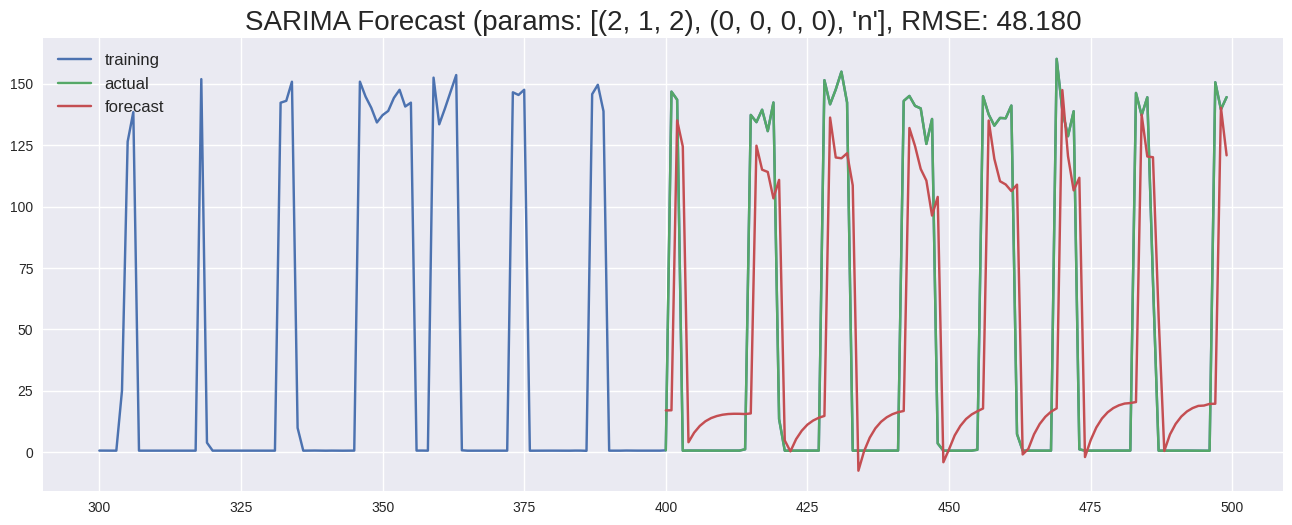

In [85]:
plt.figure(figsize=(16,6), dpi=100)
plt.plot(results_df.train[-200:], label='training')
plt.plot(results_df.test, label='actual')
plt.plot(results_df.forecast, label='forecast')
plt.title('SARIMA Forecast (params: %s, RMSE: %.3f' % (scores[0][0],scores[0][1]), fontsize = 20)
plt.legend(loc='upper left', fontsize=12)
plt.show()

### Below are models (that are not necessarily univariate, they can be multivariate)

### Neural Network

In [272]:
#import NN packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# transform list into supervised learning format
def series_to_supervised(data, n_in, n_out=1):
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    agg.dropna(inplace=True)
    return agg.values

# difference dataset
def difference(data, order):
    return [data[i] - data[i - order] for i in range(order, len(data))]

# fit a model
def model_fit(train, config):
    # unpack config
    n_input, n_nodes, n_epochs, n_batch, n_diff = config
    # prepare data
    if n_diff > 0:
        train = difference(train, n_diff)
    # transform series into supervised format
    data = series_to_supervised(train, n_in=n_input)
    # separate inputs and outputs
    train_x, train_y = data[:, :-1], data[:, -1]
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    # fit model
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model

# forecast with the fit model
def model_predict(model, history, config):
    # unpack config
    n_input, _, _, _, n_diff = config
    # prepare data
    correction = 0.0
    if n_diff > 0:
        correction = history[-n_diff]
        history = difference(history, n_diff)
    # shape input for model
    x_input = array(history[-n_input:]).reshape((1, n_input))
    # make forecast
    yhat = model.predict(x_input, verbose=0)
    # correct forecast if it was differenced
    return correction + yhat[0]

# walk-forward validation for neural nets
def walk_forward_validation(data, n_test, cfg, plot = False):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    # create results dataframe for top score
    if plot == True:
        cfg_data.update({"{}".format(cfg):[history, test, predictions]})
        results_df['train'] = [item for sublist in cfg_data["{}".format(cfg)][0] for item in sublist]
        results_df['test']  = [None for i in range(len(df[:500]) - len(cfg_data["{}".format(cfg)][1]))] + [item for sublist in cfg_data["{}".format(cfg)][1] for item in sublist]
        results_df['forecast']  = [None for i in range(len(df[:500]) - len(cfg_data["{}".format(cfg)][2]))] + cfg_data["{}".format(cfg)][2]
        results_df['forecast'] = results_df['forecast'].apply(lambda x: None if x == None else x[0])
        results_df.set_index(df[:500].index, inplace = True)
    return error

# score a model, return None on failure
def repeat_evaluate(data, config, n_test,  plot = False, n_repeats=10):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config, plot) for _ in range(n_repeats)]
    # summarize score
    result = mean(scores)
    print('> Model[%s] mean score: %.3f' % (key, result))
    return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, plot = False):
    # evaluate configs
    scores = scores = [repeat_evaluate(data, cfg, n_test, plot) for cfg in cfg_list]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

# create a list of configs to try
def model_configs():
    # define scope of configs
    n_input = [1, 5, 10]
    n_nodes = [50, 100]
    n_epochs = [100, 150]
    n_batch = [1, 100]
    n_diff = [0, 1]
    # create configs
    configs = list()
    for i in n_input:
        for j in n_nodes:
            for k in n_epochs:
                for l in n_batch:
                    for m in n_diff:
                        cfg = [i, j, k, l, m]
                        configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

# summarize model performance
def summarize_scores(name, scores):
    scores_lst = [score[1] for score in scores] 
    # print a summary
    scores_m, score_std = mean(scores_lst), std(scores_lst)
    print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
    # box and whisker plot
    plt.figure(figsize=(6, 5), dpi=100)
    plt.boxplot(scores_lst)
    plt.show()

In [230]:
# model configs
cfg_list = model_configs()

Total configs: 48


In [99]:
%%capture
start_time = timeit.default_timer()

# grid search
scores = grid_search(data, cfg_list, n_test)

In [100]:
elapsed = timeit.default_timer() - start_time
print("Grid search took %.3f seconds" % (elapsed))

Grid search took 4345.700 seconds


[5, 100, 100, 1, 0] 49.73365371973025
[5, 50, 150, 1, 0] 49.772770328146876
[5, 100, 150, 1, 0] 49.82597426219726

 Neural Network: 52.572 RMSE (+/- 1.583)


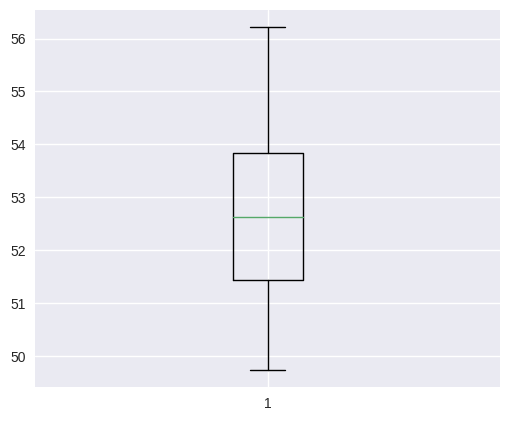

In [101]:
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)
    
# summarize scores
summarize_scores('\n Neural Network', scores)

In [102]:
results_df = pd.DataFrame()
cfg_data = {}
top_score = grid_search(data, [ast.literal_eval(scores[0][0])], n_test, plot = True)

> Model[[5, 100, 100, 1, 0]] mean score: 49.794


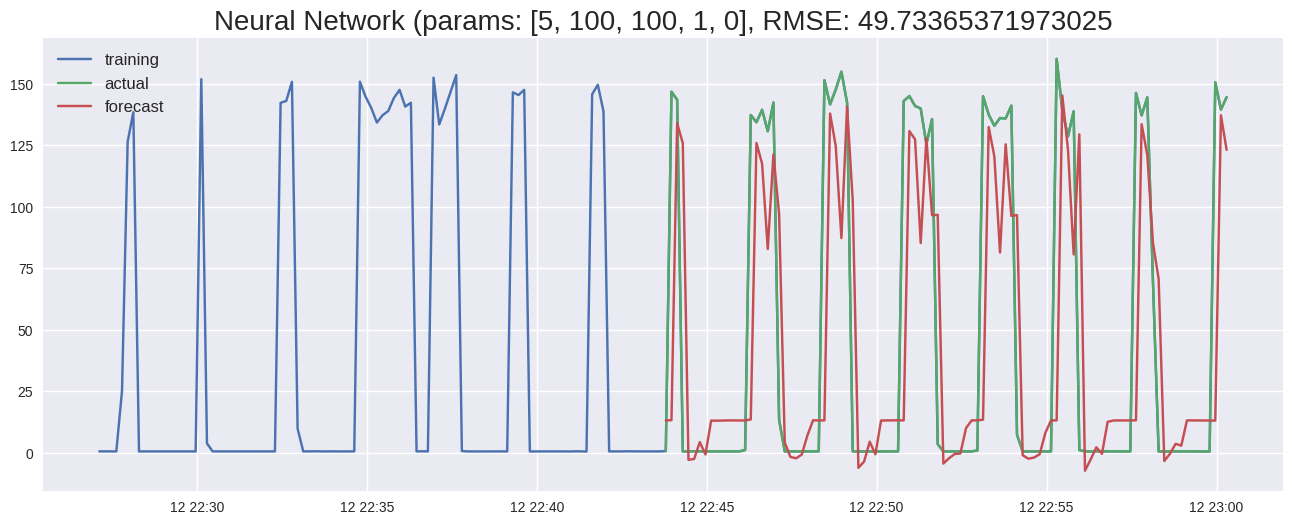

In [103]:
plt.figure(figsize=(16,6), dpi=100)
plt.plot(results_df.train[-200:], label='training')
plt.plot(results_df.test, label='actual')
plt.plot(results_df.forecast, label='forecast')
plt.title('Neural Network (params: {}, RMSE: {}'.format(scores[0][0],scores[0][1]), fontsize = 20)
plt.legend(loc='upper left', fontsize=12)
plt.show()

### Convolutional Neural Network

In [186]:

# grid search cnn 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

# fit a model
def model_fit(train, config):
    # unpack config
    n_input, n_filters, n_kernel, n_epochs, n_batch, n_diff = config
    # prepare data
    if n_diff > 0:
        train = difference(train, n_diff)
    # transform series into supervised format
    data = series_to_supervised(train, n_in=n_input)
    # separate inputs and outputs
    train_x, train_y = data[:, :-1], data[:, -1]
    # reshape input data into [samples, timesteps, features]
    n_features = 1
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], n_features))
    # define model
    model = Sequential()
    model.add(Conv1D(n_filters, n_kernel, activation='relu', input_shape=(n_input, n_features)))
    model.add(Conv1D(n_filters, n_kernel, activation='relu'))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    # fit
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model

# forecast with the fit model
def model_predict(model, history, config):
    # unpack config
    n_input, _, _, _, _, n_diff = config
    # prepare data
    correction = 0.0
    if n_diff > 0:
        correction = history[-n_diff]
        history = difference(history, n_diff)
    x_input = array(history[-n_input:]).reshape((1, n_input, 1))
    # forecast
    yhat = model.predict(x_input, verbose=0)
    return correction + yhat[0]


# create a list of configs to try
def model_configs():
    # define scope of configs
    n_input = [12]
    n_filters = [64]
    n_kernels = [3, 5]
    n_epochs = [100, 150]
    n_batch = [1, 100, 150]
    n_diff = [0, 1]
    # create configs
    configs = list()
    for a in n_input:
        for b in n_filters:
            for c in n_kernels:
                for d in n_epochs:
                    for e in n_batch:
                        for f in n_diff:
                            cfg = [a,b,c,d,e,f]
                            configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs


In [187]:
# model configs
cfg_list = model_configs()

Total configs: 24


In [113]:
# %%capture
start_time = timeit.default_timer()

# grid search
scores = grid_search(data, cfg_list, n_test)

> Model[[12, 64, 3, 100, 1, 0]] mean score: 51.872
> Model[[12, 64, 3, 100, 1, 1]] mean score: 52.991
> Model[[12, 64, 3, 100, 100, 0]] mean score: 51.065
> Model[[12, 64, 3, 100, 100, 1]] mean score: 51.418
> Model[[12, 64, 3, 100, 150, 0]] mean score: 51.101
> Model[[12, 64, 3, 100, 150, 1]] mean score: 51.358
> Model[[12, 64, 3, 150, 1, 0]] mean score: 52.061
> Model[[12, 64, 3, 150, 1, 1]] mean score: 52.578
> Model[[12, 64, 3, 150, 100, 0]] mean score: 51.393
> Model[[12, 64, 3, 150, 100, 1]] mean score: 52.426
> Model[[12, 64, 3, 150, 150, 0]] mean score: 51.156
> Model[[12, 64, 3, 150, 150, 1]] mean score: 51.974
> Model[[12, 64, 5, 100, 1, 0]] mean score: 52.939
> Model[[12, 64, 5, 100, 1, 1]] mean score: 52.120
> Model[[12, 64, 5, 100, 100, 0]] mean score: 50.766
> Model[[12, 64, 5, 100, 100, 1]] mean score: 50.581
> Model[[12, 64, 5, 100, 150, 0]] mean score: 51.170
> Model[[12, 64, 5, 100, 150, 1]] mean score: 50.180
> Model[[12, 64, 5, 150, 1, 0]] mean score: 54.331
> Model

In [114]:
elapsed = timeit.default_timer() - start_time
print("Grid search took %.3f seconds" % (elapsed))

Grid search took 2857.015 seconds


[12, 64, 5, 100, 150, 1] 50.179753568668744
[12, 64, 5, 100, 100, 1] 50.581334848128954
[12, 64, 5, 100, 100, 0] 50.76618255129565
Convolutional NN: 51.764 RMSE (+/- 0.937)


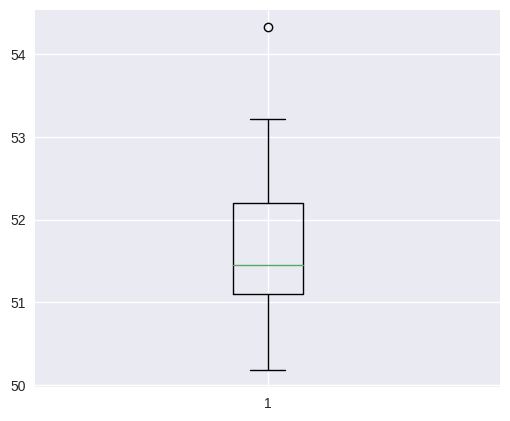

In [115]:
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)
    
# summarize scores
summarize_scores('Convolutional NN', scores)

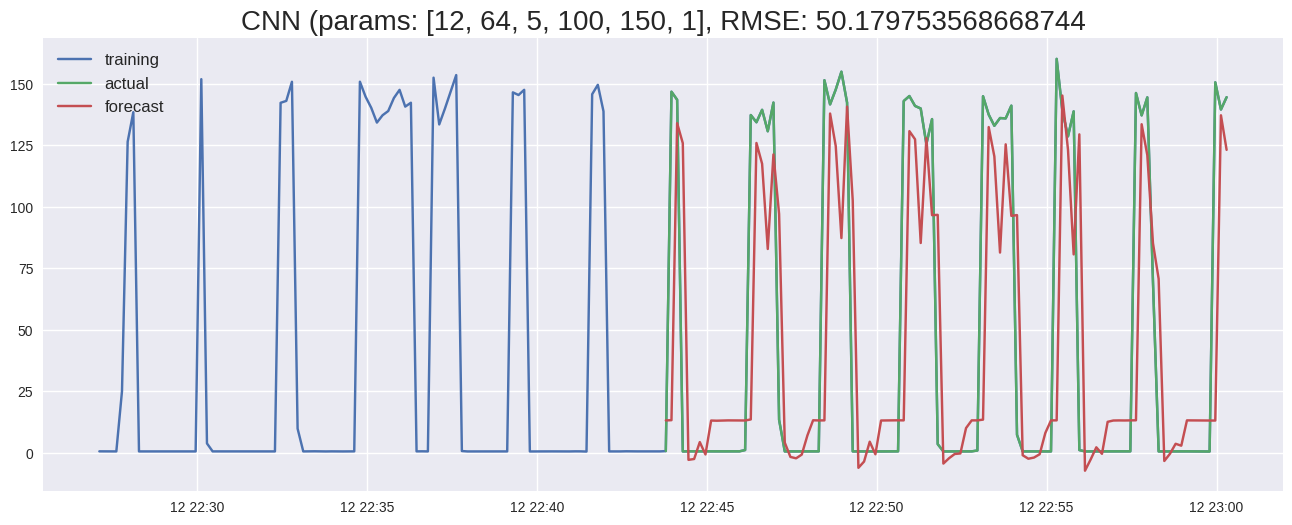

In [116]:
plt.figure(figsize=(16,6), dpi=100)
plt.plot(results_df.train[-200:], label='training')
plt.plot(results_df.test, label='actual')
plt.plot(results_df.forecast, label='forecast')
plt.title('CNN (params: {}, RMSE: {}'.format(scores[0][0],scores[0][1]), fontsize = 20)
plt.legend(loc='upper left', fontsize=12)
plt.show()

### Long short term memory

In [273]:
from tensorflow.keras.layers import LSTM

# fit lstm model
def model_fit(train, config):
    # unpack config
    n_input, n_nodes, n_epochs, n_batch, n_diff = config
    # prepare data
    if n_diff > 0:
        train = difference(train, n_diff)
    # transform series into supervised format
    data = series_to_supervised(train, n_in=n_input)
    # separate inputs and outputs
    train_x, train_y = data[:, :-1], data[:, -1]
    # reshape input data into [samples, timesteps, features]
    n_features = 1
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], n_features))
    # define model
    model = Sequential()
    model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(n_nodes, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    # fit model
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model

# forecast with the fit model
def model_predict(model, history, config):
    # unpack config
    n_input, _, _, _, n_diff = config
    # prepare data
    correction = 0.0
    if n_diff > 0:
        correction = history[-n_diff]
        history = difference(history, n_diff)
    # reshape sample into [samples, timesteps, features]
    x_input = array(history[-n_input:]).reshape((1, n_input, 1))
    # forecast
    yhat = model.predict(x_input, verbose=0)
    return correction + yhat[0]

# create a list of configs to try
def model_configs():
    # define scope of configs
    n_input = [6, 12]
    n_nodes = [100]
    n_epochs = [50, 100]
    n_batch = [1, 100, 150]
    n_diff = [0, 1]
    # create configs
    configs = list()
    for i in n_input:
        for j in n_nodes:
            for k in n_epochs:
                for l in n_batch:
                    for m in n_diff:
                        cfg = [i, j, k, l, m]
                        configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

In [274]:
df_1 = pd.DataFrame(df['performance'])
# prepare dataset
data = df_1[:500].values

In [275]:
# model configs
cfg_list = model_configs()

Total configs: 24


In [276]:
%%capture
start_time = timeit.default_timer()

# grid search
scores = grid_search(data, cfg_list, n_test)

In [277]:
elapsed = timeit.default_timer() - start_time
print("Grid search took %.3f seconds" % (elapsed))

Grid search took 6423.312 seconds


[6, 100, 100, 100, 0] 49.918428642648884
[6, 100, 50, 150, 0] 50.02440194750441
[12, 100, 50, 100, 0] 50.15042346353448

 Long Short Term Memory : 52.390 RMSE (+/- 2.471)


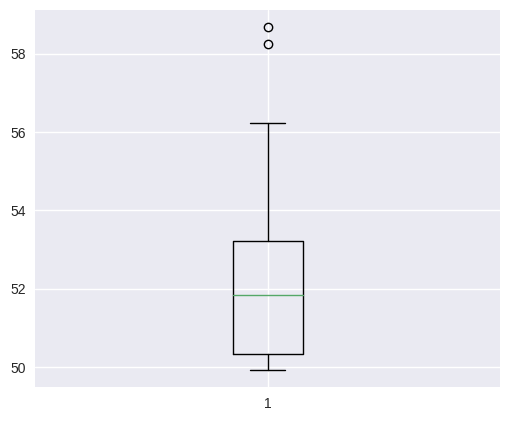

In [278]:
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)
    
# summarize scores
summarize_scores('\n Long Short Term Memory ', scores)

In [279]:
results_df = pd.DataFrame()
cfg_data = {}
top_score = grid_search(data, [ast.literal_eval(scores[0][0])], n_test, plot = True)

> Model[[6, 100, 100, 100, 0]] mean score: 49.782


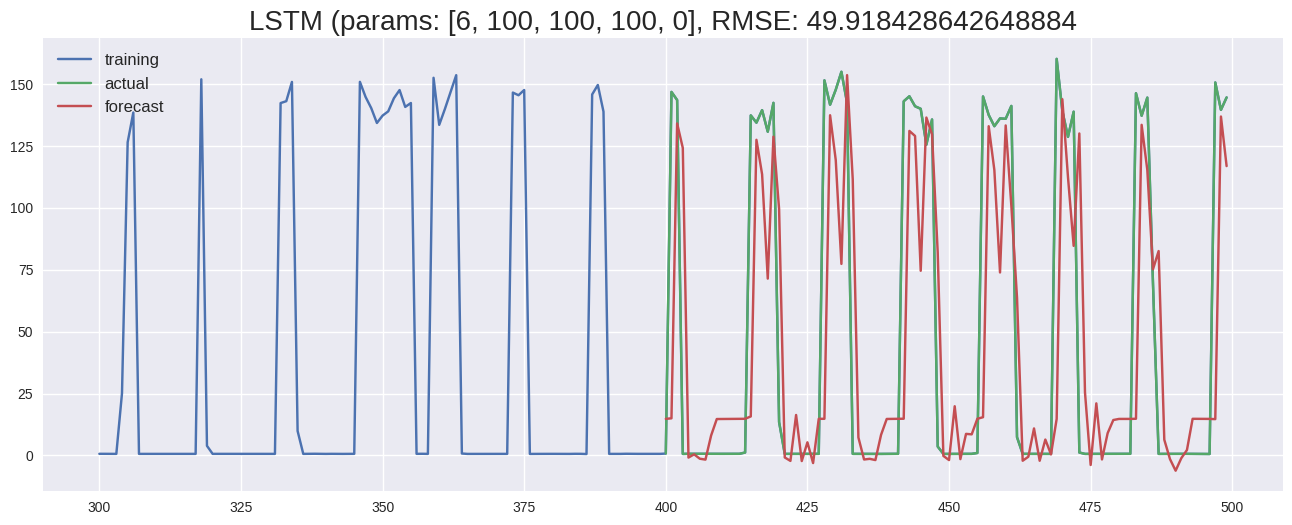

In [280]:
plt.figure(figsize=(16,6), dpi=100)
plt.plot(results_df.train[-200:], label='training')
plt.plot(results_df.test, label='actual')
plt.plot(results_df.forecast, label='forecast')
plt.title('LSTM (params: {}, RMSE: {}'.format(scores[0][0],scores[0][1]), fontsize = 20)
plt.legend(loc='upper left', fontsize=12)
plt.show()


# Results
## BaseLine Model RMSE: 47.49
## Exponential smoothing RMSE: 54.49
## Sarima RMSE: 48.18
## Neural Net RMSE: 49.73
## CNN RMSE: 50.17
## LSTM RMSE: 49.91